In [2]:
%pylab inline

import numpy as np
import pandas as pd

from graphviz import Graph
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


# Introduction

먼저 decision tree를 이해하기 위해서는 먼저 entropy를 이해해야 합니다. 

* http://incredible.ai/machine-learning/2018/11/08/Entropy/


Classification and regression trees (CART)라는 제가 태어난 1984년 [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman),[Jerome Isaac Friedman](https://en.wikipedia.org/wiki/Jerome_Isaac_Friedman), [RICHARD A. OLSHEN
](http://statweb.stanford.edu/~olshen/), 그리고 Charles Stone에 의해서 만들어진 용어로서   Classification Trees 그리고 Regression Trees를 포괄적으로 포함(Umbrella term)하는 용어입니다. 그냥 일반적으로 Decision Tree라고 보통은 말하며, ID3, C4.5, C5.0, CHAID, Decision Stump, M5, Conditional Decision Trees등등.. 정말 다양한 알고리즘이 존재합니다.


Decision tree를 출근이라는 주제로 예를 든다면 다음과 같을 수 있습니다.

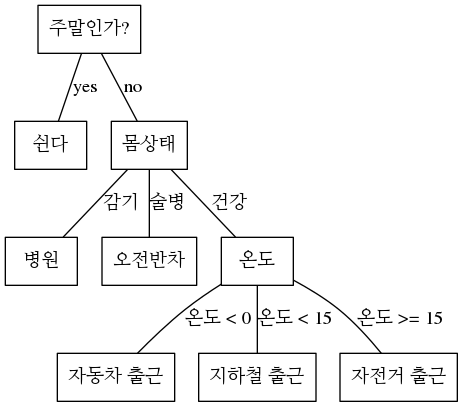

In [3]:
g = Graph('G', format='png')
g.attr('node', shape='box')
g.edge('주말인가?', '쉰다', label='yes')
g.edge('주말인가?', '몸상태', label='no')
g.edge('몸상태', '병원', label='감기')
g.edge('몸상태', '오전반차', label='술병')
g.edge('몸상태', '온도', label='건강')
g.edge('온도', '자동차 출근', label='온도 < 0')
g.edge('온도', '지하철 출근', label='온도 < 15')
g.edge('온도', '자전거 출근', label='온도 >= 15')
Image(g.pipe())

Decision tree 이용하면, 예를 들어서 개발자가 if문등을 사용해서 룰을 만드는 부분을 스스로 룰을 만들고 결정을 내리게 됩니다. 위의 경우 decision tree를 사용해서 classification을 했으며, child nodes가 3개가 나오는 경우가 있는데, 실제 알고리즘에서는 child nodes를 2개만 갖는 binary decision tree를 주로 사용하게 됩니다.

# Decision Tree Algorithms

## ID3 (Iterative Dichotomizer 3)

Iterative Dichotomizer 3는 1986년에 Ross Quinlan 에 의해서 개발 되었습니다.<br>
특징은 top down 방식으로 트리구조를 생성하며, 각각의 node에서 information gain을 최대치로 올리며, entropy값을 낮추는 기준으로 feature를 나누게 됩니다.<br>
Recursive 방식으로 feature가 homogeneous해질때까지 (하나의 분류로 나뉘게 될때까지, 즉 entropy값이 0이 됨) 트리를 생성합니다.<br>
Greedy Search방식을 사용하며 Shannon Entropy를 사용하고, multi-way tree를 생성합니다. 

단점은 다음과 같습니다.

* 데이터가 적을시 over-fitting 또는 over-classified 문제가 있음
* 오직 한가지 속성(attribute 또는 feature)만 사용하여 decision을 내림
* numerical value 또는 missing value 를 처리하지 못함


## C4.5

ID3 의 업그레이드 버젼이라고 생각하면 되고 Quinlan에 의해서 개발되었습니다.<br>
차이는 continuous 그리고 discrete features를 다룰수 있으며, buttom-up technique (보통 prunning 기법이라고함)를 사용해서 over-fitting 문제를 해결합니다. 
Splitting criteria로 Gain Ratio를 사용합니다.

단점은 다음과 같습니다. 

* C4.5는 0으로 떨어지는 empty brach를 생성합니다. 
* 비정상적인 특성을 갖은 데이터를 선택해서 over fitting이 일어날수 있습니다. (데이터가 noisy하다면 일어남) 


## C5.0

Quinlan의 가장 최근 알고리즘이지만, 저작권이 걸려 있으므로 대부분의 open source packages에서는 사용할 수 없습니다. <br>
뭐 빠르다고 하는데 굳이.. 뭐...

## CART  (Classification and Regression Trees)

특징은 ID3와 다르게 Binary tree를 사용해서 효율화를 하였으며, Twoing Criteria를 사용하며 cost-complexity Prunning 을 사용합니다.<br>
numerical 그리고 categorical 데이터 모두 다룰수 있으며, outlier에도 강합니다.<br>
Gini Impurity, Symgini, Twoing, Ordered Twoing 등등 여러가지 splitting criteria 가 사용될 수 있습니다. <br>
일반적으로 Gini Impurity를 기본적으로 사용하지만, 클래스가 많을 경우 Twoing이 좋습니다.

단점은 다음과 같습니다. 

* 오직 한가지 변수를 기준으로 split합니다.

## 정리


일반적으로 CART가 대중적으로 많이 사용되는 알고리즘이며, 엔지니어링 적으로도 entropy 대신에 gini impurity를 사용하며 binary tree를 채택함으로서 효율적으로 빠릅니다.

| Model | Splitting Criteria | Attribute | Prunning Strategy | Outlier Detection |
|:------|:-------------------|:----------|:------------------|:------------------|
| ID3   | Information Gain   | only categorical data | None | Outlier에 약함 |
| C4.5  | Gain Ratio         | Both categorical and numerical data | Error based Prunning | Outlier에 약함 |
| CART  | Gini Impurity or Twoing 등등 여러가지      | Both categorical and numerical data | Cost-complexity Prunning | Outlier에 강함 |

# Splitting Criteria 


## Information Gain

Decision Tree에서 **maximize**해야될 objective function 으로서, **특정 노드에서 어떤 feature를 갖고서 나눌지를 결정합니다**.

$$ IG(D_p, f) = I(D_p) - \sum^c_{j=1} \frac{N_j}{N_p} I(D_j) $$

* $ IG(D_p, f) $ : Information Gain 함수로서 maximize해야 됨 
* $ D_p $ : 부모 노드의 Dataset 
* $ D_j $ : 자식 노드의 Dataset 
* $ f $ : 나누려는 feature 
* $ I $ : Impurity measure  
* $ N_p $ : 부모노드의 전체 샘플 갯수 
* $ N_j $ : 자식노드의 전체 샘플 갯수 

위의 공식에서 보듯이, Information Gain이란 *(부모 노드의 Impurity)*와 *(자식노드 Impurity의 합)*의 차이입니다. <br>
**자식노드의 impurity가 낮을수록, Information Gain의 값은 높아집니다.**

하지만 대부분 검색효율화를 위해서 Binary Decision Tree를 주로 사용합니다. (2개의 자식노드만을 갖음)<br>
공식은 다음과 같습니다.

$$ IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{ N_{right}}{N_p} I(D_{right})  $$


## Entropy (Cross Entropy)


$$ I_H(t) = E \left[ I(x) \right] = - E \left[ \log_2 p_i \right] = -\sum^c_{i=1} p_i \log_2 p_i $$

모든 샘플들이 동일한 하나의 class로 분류된다면(homogeneous), entropy의 값은 0이 되며, <br>
만약 샘플의 모든 클래스가 동일하게 나뉘어진다면, entropy값은 1이 됩니다.

> 참고로 Scipy의 Decision Tree에서 entropy 는 $ \log_2 $ 를 사용합니다. <br>
> 이유는 binary tree를 사용하기 때문. <br>
> 하지만 Deep learning에서 cross entropy를 사용할때는 natural log를 사용합니다. 

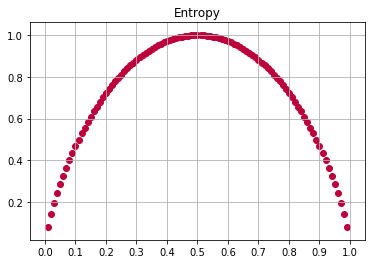

In [4]:
def entropy(p):
    # 아래 연산에서는 2개의 클래스가 존재할때 cross entropy를 사용한 예제 입니다.
    # 2개의 클래스를 갖고 있기 때문에 일어날 확률 그리고 일어나지 않을 확률.. 즉 binary classification입니다.
    
    return -(p*np.log2(p) + (1-p)*np.log2(1-p))

x = np.arange(0.01, 1, 0.01)
y = entropy(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Entropy')
scatter(x, y, color='#BB003C')


## Gini Impurity

Gini Impurity는 Entropy와 거의 동일하다고 보면 됩니다. <br>
misclassification의 확률을 **Minimize**하는것이 목표입니다.<br>

$$ I_G(t) = \sum^c_{i=1} p \cdot (1 - p_i) = 1 - \sum^c_{i=1} p_i^2 $$


Machine Learning계열의 알고리즘에서는 entropy 대신에 gini impurity를 사용합니다. <br>
이유 logarithm 연산이 exponential 연산보다 더 많은 computation power를 요구하기 때문입니다.

![Computation](images/entropy-vs-gini.png)

* 위의 이미지는 [여기](https://cacm.acm.org/magazines/2017/1/211094-exponential-laws-of-computing-growth/abstract)에서 가져왔습니다.






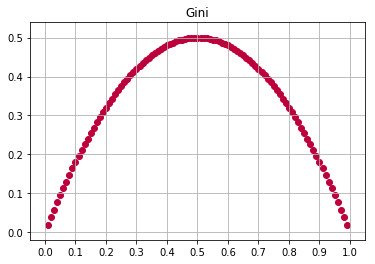

In [5]:
def gini(p):
    return 1 - (p**2 + (1-p)**2)

x = np.arange(0.01, 1, 0.01)
y = gini(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Gini')
scatter(x, y, color='#BB003C')

## Classification Error

실질적으로 위의 그래프에서처럼.. Gini Impurity 그리고 Entropy는 서로 유사한 형태의 그래프를 그리게 됩니다. <br>
다른 결과를 내놓는 impurity measure방법으로는 classification error가 있습니다.<br>
$ p_i = p(i|t) $ 라는 조건하에.. 

$$ I_E(t) = 1 - max\left( p_i \right) $$

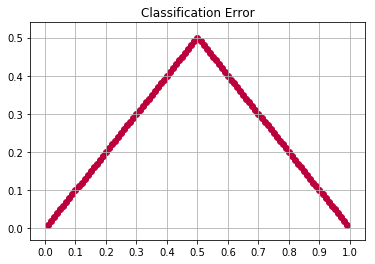

In [6]:
def classification_error(p):
    return 1 - np.max([p, 1-p], axis=0)

x = np.arange(0.01, 1, 0.01)
y = classification_error(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Classification Error')
scatter(x, y, color='#BB003C')

# How to Calculate Splitting Criteria

다음과 같은 시나리오 상황에서 Splitting 을 어떻게 하는지 알아보도록 하겠습니다.<br>
y값에 해당하는 label은 'yes' 또는 'no' 두가지로 나뉘게 됩니다. <br>
'yes'는 총 4개가 존재하고, 'no' 또한 총 4개가 존재합니다.

A와 B의 상황은 어떤 어떤 feature A 또는 feature B로 데이터를 나누었을때의 상황으로 보면 됩니다.<br>
예를 들어서 A의 상황은 습도 40% 이상인지 아닌지로 left node, right node로 나누는 것으로 가정해볼수 있고, <br>
B의 상황은 지하철 유동인구가 5000명 이상인지 아닌지로 left node, right node로 나누는 상황으로 가정해 볼 수 있습니다. <br>
결론저긍로 습도로 나눌것이냐 지하철 유동인구로 나눌것인지 결정하게 되는 것입니다. 

A상황 그리고 B상황으로 나뉘게 되는데 이때 A가 좋은지 B가 좋은지 계산을 해보도록 하겠습니다.

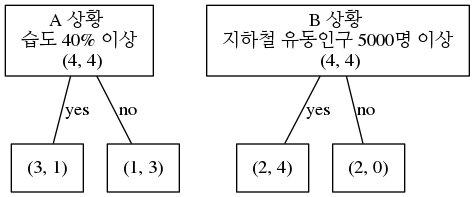

In [29]:
g = Graph('G', format='png')
g.attr('node', shape='box')
g.edge('A 상황 \n 습도 40% 이상 \n (4, 4)', '(3, 1)', label='yes')
g.edge('A 상황 \n 습도 40% 이상 \n (4, 4)', '(1, 3)', label='no')

g.edge('B 상황 \n 지하철 유동인구 5000명 이상 \n (4, 4)', '(2, 4)', label='yes')
g.edge('B 상황 \n 지하철 유동인구 5000명 이상 \n (4, 4)', '(2, 0)', label='no')
display(Image(g.pipe()))

## Splitting Criteria 

ID3의 경우는 Information Gain을 사용하여, Information Gain을 maximize 하는 것이 목표입니다.

$$ IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{ N_{right}}{N_p} I(D_{right})  $$

좀더 효율적인 방법으로 오직 자식 nodes들의 impurity 값의 합을 사용하는 방법입니다.<br>
아래의 방법은 Scipy에서 Decision Tree를 사용시 사용하는 방법입니다. 

$$ \begin{align} G(D_p, f) &= \frac{n_{left}}{N_m} I(D_{left}) + \frac{n_{right}}{N_m} I(D_{right})  \\
\theta^* &= \operatorname{argmin}_\theta  G(Q, \theta)
\end{align} $$





### Entropy를 사용했을때 계산 방법

엔트로피를 사용했을때는 **B상황** (지하철 유동인구, IG = 0.3113) 를 사용하는 것이 A상황 (습도, IG = 0.1889)보다 더 좋다는 결론을 얻습니다.

**A상황**

$$ \begin{align} 
I_H(D_p) &= - \left[ 0.5 \log_2(0.5) + 0.5 \log_2(0.5) \right] = 1 \\
I_H(D_{left}) &= -\left[ \frac{3}{4} \log_2(\frac{3}{4}) + \frac{1}{4} \log_2(\frac{1}{4})  \right] = 0.8112 \\
I_H(D_{right}) &= -\left[ \frac{1}{4} \log_2(\frac{1}{4}) + \frac{3}{4} \log_2(\frac{3}{4})  \right] = 0.8112 \\
IG_H &= 1 - \frac{4}{8} 0.8112 -  \frac{4}{8} 0.8112 = 0.1889
\end{align} $$

**B상황**

$$ \begin{align} 
I_H(D_{left}) &= -\left[ \frac{2}{6} \log_2(\frac{2}{6}) + \frac{4}{6} \log_2(\frac{4}{6})  \right] = 0.9183 \\
I_H(D_{right}) &= -\left[ \frac{2}{2} \log_2(\frac{2}{2}) + 0  \right] = 0. \\
IG_H &= 1 - \frac{6}{8} 0.9183 -  \frac{2}{8} 0 = 0.3113
\end{align} $$



### Gini Impurity 사용시 계산 방법

Gini Impurity를 사용했을때도 Entropy를 사용했을 때와 마찬가지로 **B상황** (지하철 유동인구, IG=0.16666)을 사용하는 것이, A상황 (습도, IG=0.125) 보다 더 좋다는 결론을 얻습니다. 

**A상황**

$$ \begin{align} 
I_H(D_p) &= 1 - \left( 0.5^2 + 0.5^2 \right) = 0.5 \\
I_H(D_{left}) &= 1 - \left[ \left(\frac{3}{4}\right)^2 + \left(\frac{1}{4}\right)^2 \right] = 0.375 \\
I_H(D_{right}) &= 1 - \left[ \left(\frac{1}{4}\right)^2 + \left(\frac{3}{4}\right)^2 \right] = 0.375 \\
IG_H &= 0.5 - \frac{4}{8} 0.375 -  \frac{4}{8} 0.375 = 0.125
\end{align} $$

**B상황**

$$ \begin{align} 
I_H(D_{left}) &= 1 - \left[ \left(\frac{2}{6}\right)^2 + \left(\frac{4}{6}\right)^2 \right] =  0.\bar{4} \\
I_H(D_{right}) &= 1 - \left[ \left(\frac{2}{2}\right)^2 + 0^2 \right] =  0 \\
IG_H &= 0.5 - \frac{6}{8} 0.\bar{4} -  \frac{2}{8} 0. = 0.1\bar{6}
\end{align} $$

# Tennis Example

## Preprocessing

In [7]:
tennis = pd.read_csv('tennis.csv')
x = tennis.iloc[:, range(4)]
x = pd.get_dummies(x)
y = tennis[['play']]

t = x.join(y)
t['play'] = t['play'] == 'yes'

display(t)
# display(t.groupby(['play', 'outlook_sunny']).size().unstack())
# display(t.groupby(['play', 'outlook_overcast']).size().unstack())
display(t.groupby(['play', 'humidity_high']).size().unstack())

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,play
0,False,0,0,1,0,1,0,1,0,False
1,True,0,0,1,0,1,0,1,0,False
2,False,1,0,0,0,1,0,1,0,True
3,False,0,1,0,0,0,1,1,0,True
4,False,0,1,0,1,0,0,0,1,True
5,True,0,1,0,1,0,0,0,1,False
6,True,1,0,0,1,0,0,0,1,True
7,False,0,0,1,0,0,1,1,0,False
8,False,0,0,1,1,0,0,0,1,True
9,False,0,1,0,0,0,1,0,1,True


humidity_high,0,1
play,,
False,1,4
True,6,3


## Model

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualization

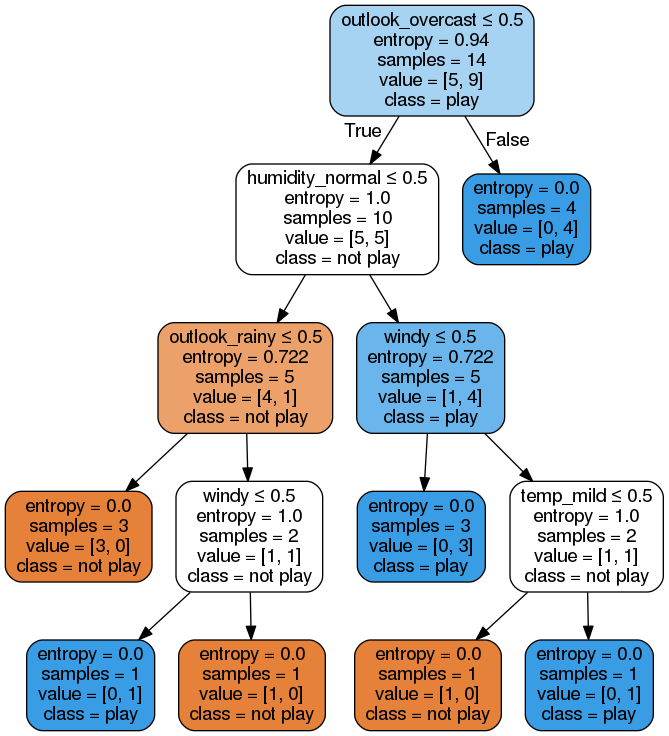

In [128]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, rounded=True,
                filled=True, 
                special_characters=True, 
                feature_names=x.columns.tolist(), 
                class_names=['not play', 'play'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Explained

첫번째 노드를 보면 outlook_overcast <= 0.5 로 나뉘는 것을 알 수 있습니다.<br>
그 많은 features들 중에서 outlook_overcast가 선택이 되었을까요?

Scikit Learn의 [문서](https://scikit-learn.org/stable/modules/tree.html)를 보면 다음과 같은 공식이 사용됩니다.

$$ \begin{align} G(Q, \theta) &= \frac{n_{left}}{N_m} H(Q_{left}(\theta)) + \frac{n_{right}}{N_m} H(Q_{right}(\theta))  \\
\theta^* &= \operatorname{argmin}_\theta  G(Q, \theta)
\end{align} $$


* $ N_m $ : 해당 노드의 데이터 총 갯수
* $ N_{left} $ : 왼쪽 노드의 데이터 총 갯수
* $ N_{right} $ : 오른쪽 노드의 데이터 총 갯수
* $ H $ : Impurity functino으로서 entropy, gini, classification error 등등이 사용될수 있습니다.
* $ Q_{left} $ : outlook_overcast <= 0.5 처럼 어떤 기준에 의해서 나뉘었을때 왼쪽에 속한 데이터
* $ Q_{right} $ : outlook_overcast <= 0.5 처럼 어떤 기준에 의해서 나뉘었을때 오른쪽에 속한 데이터
* $ \theta^* $ : 자식노드의 impurity값이 가장 낮은 feature를 선택한다는 뜻

**한마디로 왼쪽 노드의 impurity 값과 오른쪽 노드의 impurity값을 합한뒤에 (normalization하고..) 가장 낮은 impurity를 나타내는 feature를 선택하는 것입니다.**

> ID3 의 경우는 위의 공식대신에 Information Gain을 사용합니다.<br>
> 사실 parent node의 impurity 값에서 자식 노드들의 impurity값을 빼는 부분이 다르고 매우 유사합니다.

In [53]:
def display_splitting(data, target):
    n = data[target].count()
    n_yes = data[target][data[target] == True].count()
    n_no = n - n_yes
    
    if n_yes == n or n_no == n:
        print('[Edge Node] n:', n, 'n_yes:', n_yes, 'n_no:', n_no)
        return
    
    parent_impurity = entropy(n_yes/n)
    print('Parent Impurity:', parent_impurity, 'n:', n, 'yes:', n_yes, 'no:', n_no)
    
    min_child_impurity = np.inf
    childs = None
    
    thresholds = (data.max() - data.min())/2
    for column, threshold in thresholds.items():
        child_n = data[column].count()
        child_yes = data[column][(data[column] > threshold) == True].count()
        child_no = child_n - child_yes

        child_impurity1 = child_yes/child_n * entropy(child_yes/child_n)
        child_impurity2 = child_no/child_n * entropy(child_no/child_n)
        child_impurity = child_impurity1 + child_impurity2
        
        if child_impurity < min_child_impurity:
            min_child_impurity = child_impurity
            data2 = data.drop(column, axis=1)
            
            childs = (data2[(data[column] > threshold) == False], 
                      data2[(data[column] > threshold) == True])
        
        print('[{0:16}] child impurity: {1:<4}(left) + {2:<4}(right) = {3}'.format(column, 
                                                                round(child_impurity1, 2), 
                                                                round(child_impurity2, 2), 
                                                                round(child_impurity, 4)))
    return childs
        
print('[Root Node]')   
left, right = display_splitting(t, 'play')

print()
print('[Left Node]')
display_splitting(left, 'play')

print()
print('[right Node]')
display_splitting(right, 'play')
print()

[Root Node]
Parent Impurity: 0.9402859586706309 n: 14 yes: 9 no: 5
[windy           ] child impurity: 0.42(left) + 0.56(right) = 0.9852
[outlook_overcast] child impurity: 0.25(left) + 0.62(right) = 0.8631
[outlook_rainy   ] child impurity: 0.34(left) + 0.6 (right) = 0.9403
[outlook_sunny   ] child impurity: 0.34(left) + 0.6 (right) = 0.9403
[temp_cool       ] child impurity: 0.25(left) + 0.62(right) = 0.8631
[temp_hot        ] child impurity: 0.25(left) + 0.62(right) = 0.8631
[temp_mild       ] child impurity: 0.42(left) + 0.56(right) = 0.9852
[humidity_high   ] child impurity: 0.5 (left) + 0.5 (right) = 1.0
[humidity_normal ] child impurity: 0.5 (left) + 0.5 (right) = 1.0
[play            ] child impurity: 0.6 (left) + 0.34(right) = 0.9403

[Left Node]
Parent Impurity: 1.0 n: 10 yes: 5 no: 5
[windy           ] child impurity: 0.39(left) + 0.58(right) = 0.971
[outlook_rainy   ] child impurity: 0.5 (left) + 0.5 (right) = 1.0
[outlook_sunny   ] child impurity: 0.5 (left) + 0.5 (right) = 

자식 노드들의 impurity값을 합쳤을때 가장 낮은 feature를 선택하는 것입니다. <br>
가장 낮은 feature는 outlook_overcast, temp_cool, temp_hot 인데 일단 이 셋중에 outlook_overcast가 가장 먼저 나온값이기 때문에 선택이 되었습니다.

# IRIS Example

## Preprocess

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

display(x.describe())
display(x.head())
display(y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Model

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualization

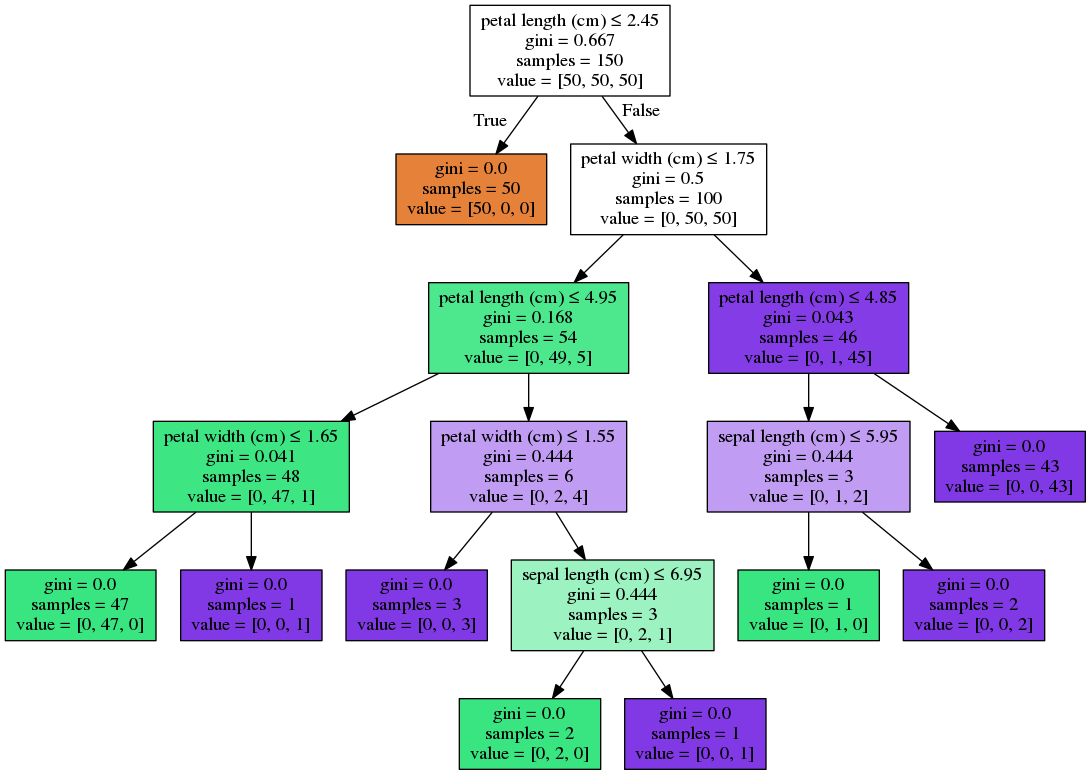

In [12]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, 
                special_characters=True, 
                feature_names=x.columns.tolist(), )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())